In [3]:
import numpy as np
from pandas.io.parsers import read_csv

#/content/drive/MyDrive/AA/p4/data4.csv

from google.colab import drive
drive.mount('/content/drive')

valores=read_csv("/content/drive/MyDrive/AA/p4/data4.csv",header=None).to_numpy()


In [4]:
#seleccionar 80 filas aleatorias para entrenamiento de valores
np.random.shuffle(valores)
valores_ent = valores[:80, :]
valores_test = valores[80:100, :]
X = valores_ent[:, 0:2] #[fila[0:2] for fila in valores]
Y = valores_ent[:,2]

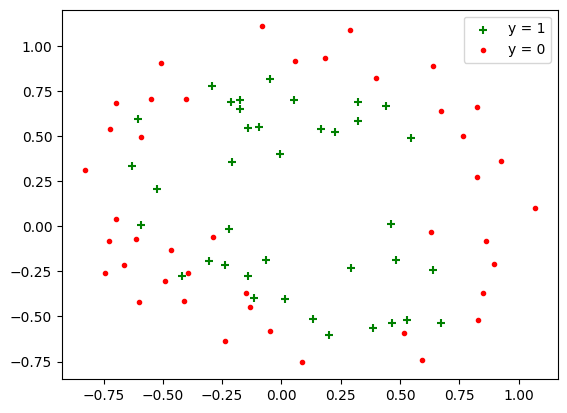

In [5]:
import matplotlib.pyplot as plt

pos = np.where(Y == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "y = 1")

neg = np.where(Y == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "y = 0")

plt.legend()
plt.show()


In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(6)
XX = poly.fit_transform(X)

In [7]:
def func_coste(y_hat, Y, L):
    Y_resd=Y-y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/(2*len(Y)) + L*np.sum(np.dot(w.T,w))/(2*len(Y))

def func_sigmoide(w,b,x):
    z = np.dot(x,w)+b
    return 1/(1+np.exp(-z))

def funcion_grad(X, y, w, b, L):
    y_hat = func_sigmoide(w,b,X)
    gb = (np.sum(y_hat-y))
    gw = np.dot((y_hat-y),X) + L/len(y)*w
    return gw, gb

def funcion_grad_desc(X, y, alpha, num_iter, L):
    w = np.zeros(X.shape[1])
    b = 0
    for i in range(num_iter):
        gw, gb = funcion_grad(X, y, w, b, L)
        w = w - alpha*gw
        b = b - alpha*gb
    return w, b

w, b = funcion_grad_desc(XX, Y, 0.001, 100000, 1)
w,b


(array([ 1.06215265,  3.78742912,  4.49167033, -7.66848344, -5.95359657,
        -2.41224086, -4.40577412, -3.64537444,  4.53415163,  0.67555755,
        -4.25956158, -0.83496441, -3.34037489,  0.53118242, -6.63691314,
        -1.94681041, -1.61666035,  1.23772217, -1.88275046, -1.08390589,
        -0.87168535, -2.94611822, -0.6543327 , -0.88846677,  0.92170651,
        -2.93333768, -0.01896559, -5.8666395 ]),
 2.767906494376709)

In [8]:
def funcion_prediccion(w, b, X):
    y_hat = func_sigmoide(w,b,X)
    return y_hat


y_hat = funcion_prediccion(w, b, XX)
y_h = np.where(y_hat >= 0.5, 1, 0)

print("Accuracy: ", np.sum(y_h == Y)/len(Y))

Accuracy:  0.8875


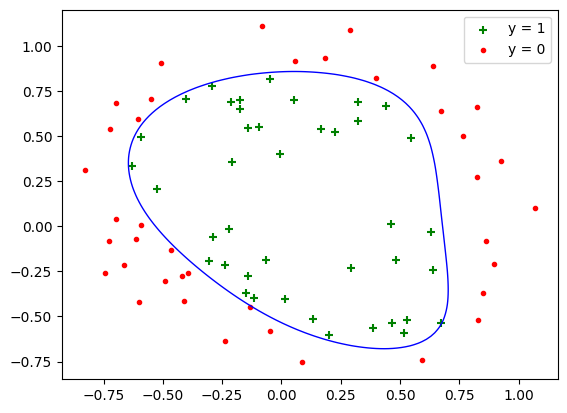

In [9]:
import matplotlib.pyplot as plt

pos = np.where(y_h == 1)
plt.scatter(X[pos,0], X[pos,1], marker='+', c='g', label = "y = 1")

neg = np.where(y_h == 0)
plt.scatter(X[neg,0], X[neg,1], marker='.', c='r', label = "y = 0")

def non_linear_decision_boundary(w, b, X):
    x1 = np.linspace(-0.75, 1.0, 100)
    x2 = np.linspace(-0.75, 1.0, 100)
    x1, x2 = np.meshgrid(x1, x2)
    X = np.c_[x1.ravel(), x2.ravel()]
    XX = poly.fit_transform(X)
    y_hat = funcion_prediccion(w, b, XX)
    y_hat = y_hat.reshape(x1.shape)
    return x1, x2, y_hat

x1, x2, y_hat = non_linear_decision_boundary(w, b, X)
plt.contour(x1, x2, y_hat, [0.5], linewidths=1, colors='b')

plt.legend()
plt.show()


In [51]:
i= 0
j = 0
accs = np.zeros(100)
while i < 100:
    w,b = funcion_grad_desc(XX, Y, 0.001, 100000, i)
    i += 1
    y_hat = funcion_prediccion(w, b, XX)
    y_h = np.where(y_hat >= 0.5, 1, 0)
    accs[j] = np.sum(y_h == Y)/len(Y) * 100
    j += 1

In [52]:
accs

array([88.75, 88.75, 87.5 , 85.  , 85.  , 85.  , 85.  , 85.  , 85.  ,
       85.  , 85.  , 85.  , 85.  , 85.  , 85.  , 85.  , 85.  , 85.  ,
       86.25, 86.25, 86.25, 86.25, 86.25, 86.25, 86.25, 86.25, 86.25,
       86.25, 86.25, 86.25, 86.25, 85.  , 85.  , 85.  , 85.  , 85.  ,
       85.  , 85.  , 85.  , 85.  , 85.  , 85.  , 85.  , 85.  , 85.  ,
       85.  , 85.  , 85.  , 85.  , 85.  , 85.  , 85.  , 85.  , 85.  ,
       85.  , 85.  , 85.  , 85.  , 85.  , 85.  , 85.  , 85.  , 85.  ,
       85.  , 85.  , 83.75, 83.75, 83.75, 83.75, 83.75, 83.75, 83.75,
       83.75, 83.75, 83.75, 83.75, 83.75, 83.75, 83.75, 83.75, 83.75,
       83.75, 83.75, 83.75, 83.75, 83.75, 83.75, 83.75, 83.75, 83.75,
       83.75, 83.75, 83.75, 83.75, 83.75, 83.75, 83.75, 83.75, 83.75,
       83.75])

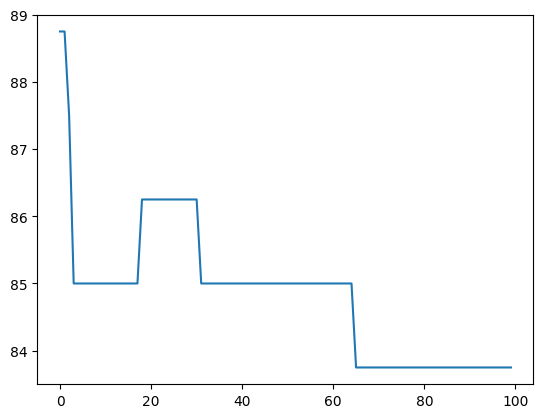

In [54]:
x1 = np.array([i for i in range(100)])
plt.plot(x1, accs)